nn
 0 0 48 127 87 0 0 63 78 0 0 0 75 100 81 0 0 75 100 81 0 0 48 127 81 0 0 68 100 81


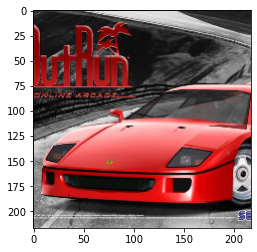

In [2]:
#ide na git
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse

img_path = "C:/soft/bb/MusicGenerator/first.png"#args['image']

def extract_features(filename, model):
    try:
        picture = Image.open(filename)
    except:
        print("Can't open image! Check path.")
    picture = picture.resize((299,299))
    picture = np.array(picture)
    
    if picture.shape[2] == 4:
        picture = picture[..., :3]
    picture = np.expand_dims(picture, axis=0)
    picture = picture/127.5
    picture = picture - 1.0
    feature = model.predict(picture)
    return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def generate_desc(model, tokenizer, photo_to_predict, max_length):
    in_text = ''
    for i in range(max_length):
        seq = tokenizer.texts_to_sequences([in_text])[0]
        seq = pad_sequences([seq], maxlen=max_length)
        prediction = model.predict([photo_to_predict,seq], verbose=0)
        prediction = np.argmax(prediction)
        word = word_for_id(prediction, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text
max_length = 30
tokenizer = load(open("tokenizer.p","rb"))
model = load_model('models/model_9.h5')
xception_model = Xception(include_top=False, pooling="avg")
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)
description = generate_desc(model, tokenizer, photo, max_length)
print("nn")
print(description)
plt.imshow(img)

In [1]:
import numpy as np
from PIL import Image
import os
import string
from pickle import dump
from pickle import load
from keras.applications.xception import Xception #to get pre-trained model Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.text import Tokenizer #for text tokenization
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers.merge import add
from keras.models import Model, load_model
from keras.layers import Input, Dense#Keras to build our CNN and LSTM
from keras.layers import LSTM, Embedding, Dropout
from tqdm import tqdm_notebook as tqdm #to check loop progress
tqdm().pandas()

from keras.preprocessing.text import Tokenizer

<ipython-input-1-8a584cf2be25>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

In [33]:
stri = "1-"
i = 0

for number in description.split(" ")[2:]: 
    if i % 5 == 4:
        stri+="1"
    else:
        stri += number
    
    if i % 5 == 3:
        stri+=" "
    else:
        stri+="-"
    i+=1
    
print(stri)   
sourceFile = open('demo.txt', 'w')
print(stri, file = sourceFile)
sourceFile.close()

1-0-48-127-87 1-0-63-78-0 1-0-75-100-81 1-0-75-100-81 1-0-48-127-81 1-0-68-100-81 


In [ ]:
1-0-48-127-87 1-0-63-78-0 1-0-75-100-81 0-0-75-100-81 0-0-48-127-81 0-0-68-100-81